In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
series=[500,350,250,400,450,350,200,300,350,200,150,400,550,350,250,550,550,400,350,600,750,500,400,650,850]
index=pd.date_range('2000-03-31', periods=25, freq='Q')
data=pd.DataFrame(series, index=index)
data.columns=['Demand']

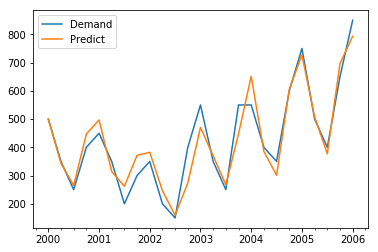

In [3]:
fit1 = ExponentialSmoothing(data['Demand'], seasonal_periods=4 , trend='add', seasonal='mul').fit()
data['Predict']=fit1.fittedvalues
data.plot()

In [4]:
sqrt(mean_squared_error(data['Demand'], data['Predict']))

53.37257806171788

In [5]:
mean_absolute_error(data['Demand'], data['Predict'])

41.85277665544335

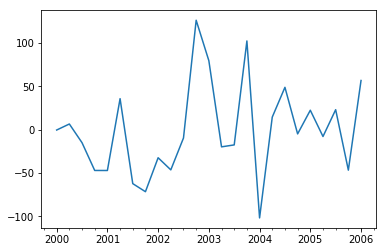

In [6]:
data['Resid']=fit1.resid
data['Resid'].plot()

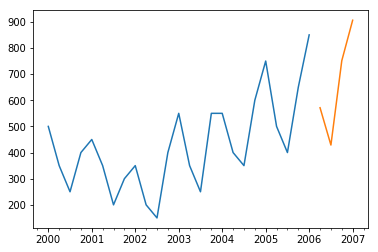

In [7]:
index=pd.date_range('2006-06-30', periods=4, freq='Q')
datap=pd.DataFrame(fit1.forecast(4), index=index)
datap.columns=['Predict']
data['Demand'].plot()
datap['Predict'].plot()

In [8]:
fit1.params

{'damping_slope': nan,
 'initial_level': 571.4286398129714,
 'initial_seasons': array([0.84785489, 0.56435295, 0.41577146, 0.71556852]),
 'initial_slope': 18.700003064693195,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.8700136796734163,
 'smoothing_seasonal': 0.0,
 'smoothing_slope': 1.818780385451967e-19,
 'use_boxcox': False}